<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/HOML_Exercise_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [2]:
#10
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()


X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
X_train, X_valid, X_test = X_train.astype(np.float32), X_valid.astype(np.float32), X_test.astype(np.float32)

11501568/11490434 [==============================] - 0s 0us/step


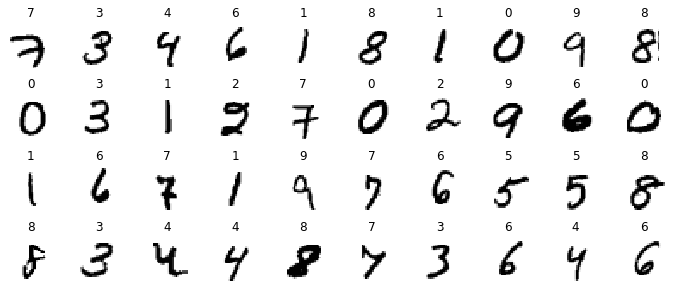

In [4]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [5]:
#최적의 학습률 찾기

K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    #1 배치 끝날때
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)


In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
#배치가 끝날때 학습률을 0.5% 씩 증가시킨다.
expon_lr = ExponentialLearningRate(factor=1.005)

In [7]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 8s 3ms/step - loss: nan - accuracy: 0.5658 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

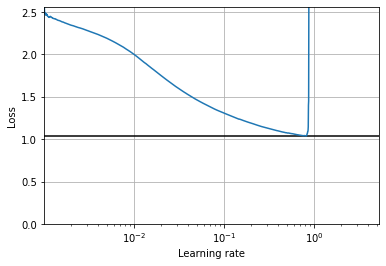

In [8]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

run_index = 1 # 실행할 때마다 이 값을 늘립니다
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [10]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 5s 2ms/step - loss: 0.2338 - accuracy: 0.9270 - val_loss: 0.1048 - val_accuracy: 0.9682
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0934 - accuracy: 0.9707 - val_loss: 0.0921 - val_accuracy: 0.9710
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0660 - accuracy: 0.9790 - val_loss: 0.0726 - val_accuracy: 0.9808
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0467 - accuracy: 0.9850 - val_loss: 0.0750 - val_accuracy: 0.9788
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0789 - val_accuracy: 0.9796
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.0675 - val_accuracy: 0.9830
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0879 - val_ac

In [11]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0724 - accuracy: 0.9799


[0.0724339708685875, 0.9799000024795532]